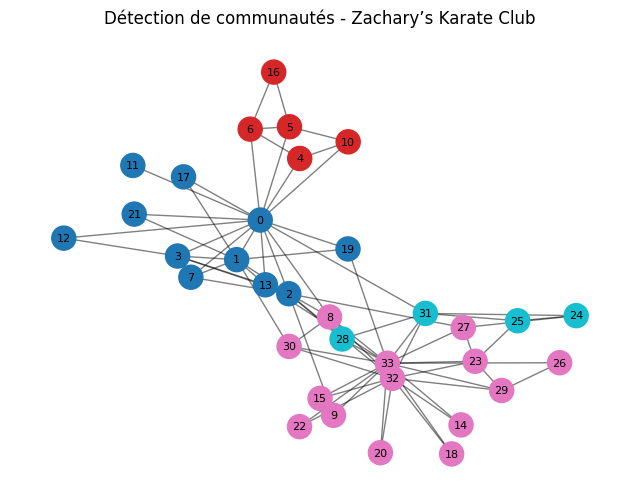

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Charger le graphe du club de karaté
G = nx.karate_club_graph()


# Si le module community-louvain n’est pas installé, on utilise une méthode interne de NetworkX
from networkx.algorithms import community
communities = community.greedy_modularity_communities(G)
communities = community.louvain_communities(G)


partition = {}
for i, c in enumerate(communities):
    for node in c:
        partition[node] = i

# Visualisation
pos = nx.spring_layout(G, seed=42)  # Positionnement des nœuds
cmap = plt.get_cmap('tab10')

plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(
    G,
    pos,
    node_size=300,
    cmap=cmap,
    node_color=[partition[n] for n in G.nodes()]
)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Détection de communautés - Zachary’s Karate Club")
plt.axis("off")
plt.show()
